In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve

%matplotlib inline

In [3]:
preds = pd.read_csv('../data/calibrated_driveway_predictions.csv', index_col=0)
labels = pd.read_csv('../labels/labels_final.csv', index_col=0)
labels = labels[labels['has_parking'] != 2]
df = labels.merge(preds, how='left', left_on='MBL', right_on='MBL')
print(df.shape)
df.dropna(subset=['yes_driveway'], inplace=True)
print(df.shape)

(6445, 4)
(6390, 4)


In [4]:
hand_labels = pd.read_csv('../labels/training_labels_updated_111219.csv', index_col=0)

In [5]:
uncal_prob_true, uncal_prob_pred = calibration_curve(y_true=df['has_parking'], 
                                                     y_prob=df['yes_driveway'],
                                                     n_bins=10)

In [6]:
cal_prob_true, cal_prob_pred = calibration_curve(y_true=df['has_parking'], 
                                                 y_prob=df['calibrated_yes_driveway'],
                                                 n_bins=10)

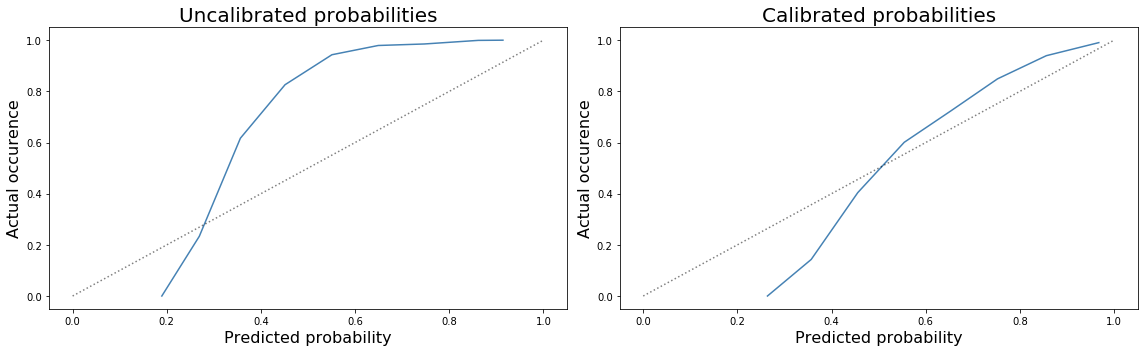

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
FONTSIZE=16
TITLEFONTSIZE=20

ax[0].plot(uncal_prob_pred, uncal_prob_true, color='steelblue')
ax[0].plot(np.linspace(0,1,50), np.linspace(0,1,50), linestyle='dotted', color='black', alpha=0.5)
ax[0].set_xlabel('Predicted probability', fontsize=FONTSIZE)
ax[0].set_ylabel('Actual occurence', fontsize=FONTSIZE)

ax[0].set_title('Uncalibrated probabilities', fontsize=TITLEFONTSIZE)

ax[1].plot(cal_prob_pred, cal_prob_true, color='steelblue')
ax[1].plot(np.linspace(0,1,50), np.linspace(0,1,50), linestyle='dotted', color='black', alpha=0.5)
ax[1].set_xlabel('Predicted probability', fontsize=FONTSIZE)
ax[1].set_ylabel('Actual occurence', fontsize=FONTSIZE)
ax[1].set_title('Calibrated probabilities', fontsize=TITLEFONTSIZE)

plt.tight_layout()
plt.savefig('../images/final_calibration.png', dpi=450);